In [1]:
pip install sklearn --user

     |████████████████████████████████| 7.1MB 8.5MB/s 
     |████████████████████████████████| 296kB 6.5MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=c17073a195853ec3d9e232504f598becb9460e23ca5a90522bddb6322278bfa8
  Stored in directory: /home/thwalker/snap/code/common/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df1 = sns.load_dataset('tips')

In [4]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
df1 = df1.drop(df1.iloc[:, 2:7], axis = 1)

In [7]:
df1

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [9]:
df1['tip'].mean()

2.99827868852459

Text(0, 0.5, 'tips')

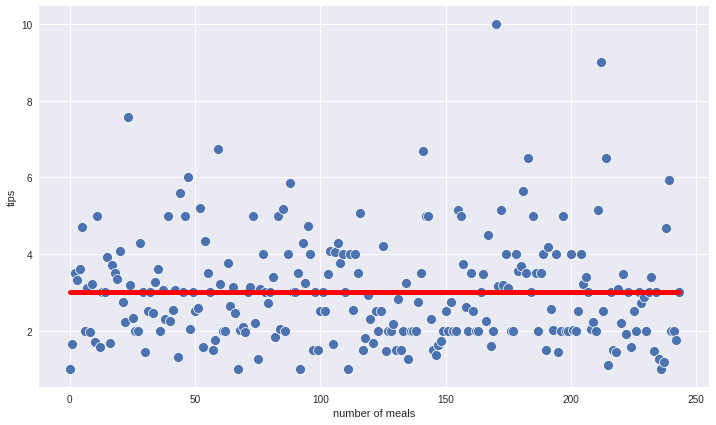

In [12]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = df1['tip'], s = 100)
sns.lineplot(df1.index, df1['tip'].mean(), linewidth = 5, color = 'r')
plt.xlabel('number of meals')
plt.ylabel('tips')

Text(0, 0.5, 'tips')

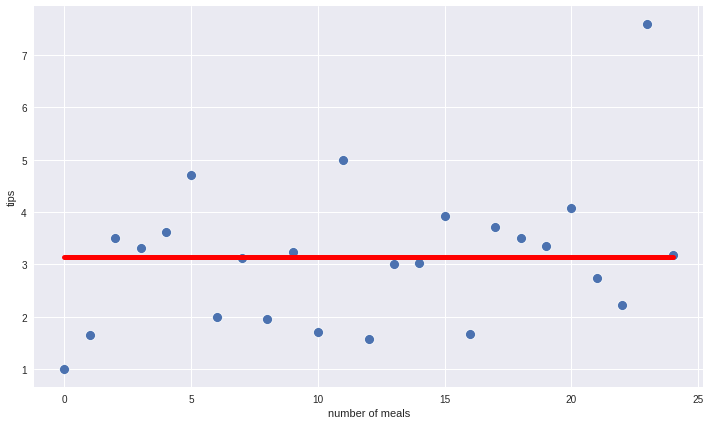

In [13]:
plt.figure(figsize = (12,7))
sns.scatterplot(data = df1['tip'].head(25), s = 100)
sns.lineplot(df1.index[:25], df1['tip'].head(25).mean(), linewidth = 5, color = 'r')
plt.xlabel('number of meals')
plt.ylabel('tips')

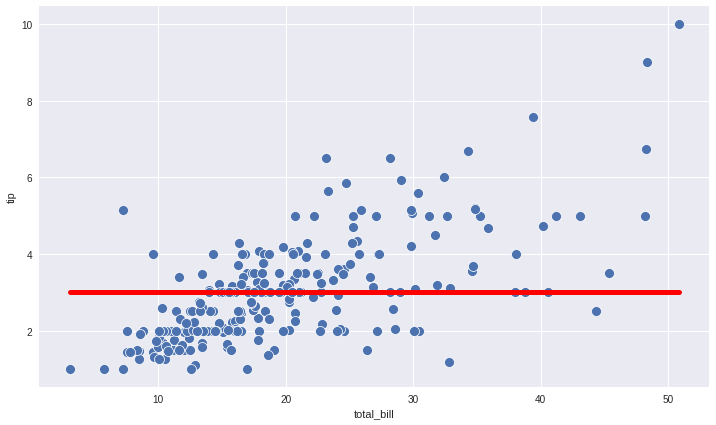

In [14]:
plt.figure(figsize = (12,7))
sns.scatterplot(df1['total_bill'], df1['tip'], s = 100)
sns.lineplot(df1['total_bill'], df1['tip'].mean(), linewidth = 5, color = 'r')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df1['total_bill']).reshape(-1,1),np.array(df1['tip']))

In [17]:
df1['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [18]:
np.array(df1['total_bill'])

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [19]:
np.array(df1['total_bill']).reshape(-1,1)

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59],
       [25.29],
       [ 8.77],
       [26.88],
       [15.04],
       [14.78],
       [10.27],
       [35.26],
       [15.42],
       [18.43],
       [14.83],
       [21.58],
       [10.33],
       [16.29],
       [16.97],
       [20.65],
       [17.92],
       [20.29],
       [15.77],
       [39.42],
       [19.82],
       [17.81],
       [13.37],
       [12.69],
       [21.7 ],
       [19.65],
       [ 9.55],
       [18.35],
       [15.06],
       [20.69],
       [17.78],
       [24.06],
       [16.31],
       [16.93],
       [18.69],
       [31.27],
       [16.04],
       [17.46],
       [13.94],
       [ 9.68],
       [30.4 ],
       [18.29],
       [22.23],
       [32.4 ],
       [28.55],
       [18.04],
       [12.54],
       [10.29],
       [34.81],
       [ 9.94],
       [25.56],
       [19.49],
       [38.01],
       [26.41],
       [11.24],
       [48.27],
       [20.29],
       [13.81],
       [

In [20]:
lr = linear_model.LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predicted_tips = lr.predict(X_test)

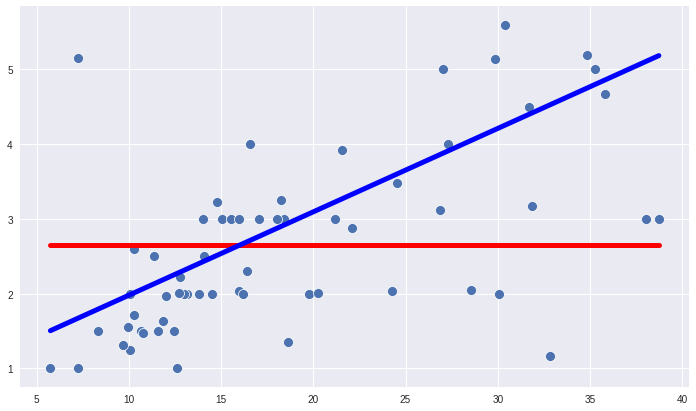

In [24]:
plt.figure(figsize = (12,7))
sns.scatterplot(X_test.flatten(), y_test, s = 100)
sns.lineplot(X_test.flatten(), y_test.mean(), linewidth = 5, color = 'r')
sns.lineplot(X_test.flatten(), predicted_tips, linewidth = 5, color = 'b')

In [25]:
df1['predicted_tips'] = lr.predict(np.array(df1['total_bill']).reshape(-1,1))

In [26]:
df1.head(10)

,total_bill,tip,predicted_tips
0,16.99,1.01,2.759498
1,10.34,1.66,2.017330
2,21.01,3.50,3.208146
3,23.68,3.31,3.506129
4,24.59,3.61,3.607689
5,25.29,4.71,3.685812
6,8.77,2.00,1.842111
7,26.88,3.12,3.863263
8,15.04,1.96,2.541870
9,14.78,3.23,2.512852


In [27]:
lr.score(X_test, y_test)

0.22650120443618915